In [1]:
from __future__ import division
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np,  matplotlib.pyplot as plt, sys
from time import time
from pylab import plot, show, legend
sys.path.append('/home/postdoc/dsen/Desktop/alphaSMC')
from PF import *
sys.path.append('/home/postdoc/dsen/Desktop/alphaSMC/Lorenz63_model')
from Lorenz63 import *
plt.rcParams['figure.figsize'] = (15.0, 3.0)

In [2]:
dt = 5e-3
delta = 10*dt
T = 500

sigma, rho, beta, noise_intensity, obs_noise = 10.0, 28.0, 8/3, 5e-1, 5e-1
theta = [sigma, rho, beta, noise_intensity, dt, delta, obs_noise]
x_0 = np.ones(3)

y, X = simulate_data_Lorenz63(theta, x_0, T)
data = dict(x_0=x_0, y=y)

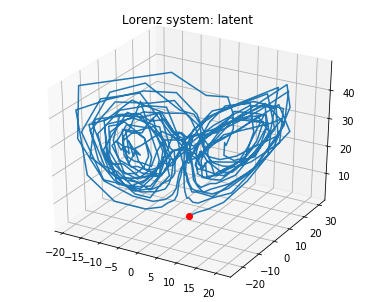

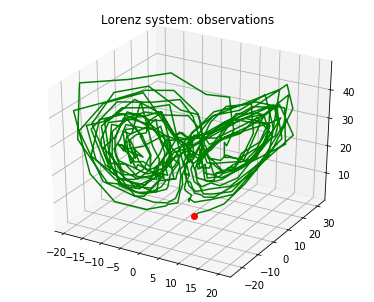

In [3]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X[:,0], X[:,1], X[:,2])
ax.plot(X[0:1,0], X[0:1,1], X[0:1,2], 'ro')
plt.title("Lorenz system: latent");

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(y[:,0], y[:,1], y[:,2], color='green')
ax.plot(y[0:1,0], y[0:1,1], y[0:1,2], 'ro')
plt.title("Lorenz system: observations");

In [4]:
def test_fn(x) : return np.mean(x,1)

In [5]:
S = 10
N = 2**S
potential, propagate = potential_Lorenz63, propagate_Lorenz63
log_NC_bpf, _, particles_bpf = bootstrap_PF(data, theta, potential, propagate, test_fn, N, store_paths=True)

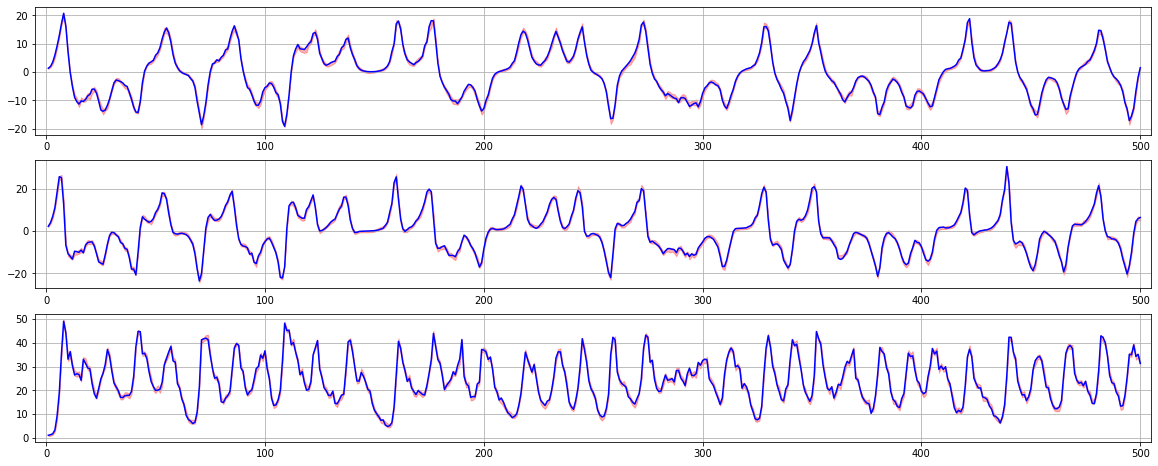

In [6]:
plt.rcParams['figure.figsize'] = (20.0, 8.0)
for i in range(3) :
    plt.subplot(3,1,i+1)
    CI = np.percentile(particles_bpf[:,:T,i],q=[2.5,97.5],axis=0)
    plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
    plt.grid(True)
    plt.plot(np.arange(1,T+1), X[1:,i], "blue")
    plt.xlim([-5,T+5])

### AIRPF:

In [7]:
A = np.zeros((S,N,N))
for s in range(S) :
    A[s] = np.kron(np.kron(np.eye(2**(S-(s+1))),np.ones((2,2))/2),np.eye(2**s))
# A = npr.rand(2,N,N)
# for i in range(2) :
#     A[i] = A[i]/np.sum(A[i],0)

In [8]:
log_NC_airpf, _, particles_airpf = AIRPF(data, theta, potential, propagate, test_fn, A, store_paths=True)

/home/postdoc/dsen/Desktop/alphaSMC/PF.py:179: RuntimeWarning: invalid value encountered in true_divide
  prob_matrix = (weights.T)/W_out
/home/postdoc/dsen/Desktop/alphaSMC/PF.py:108: RuntimeWarning: invalid value encountered in less
  k = (s < r).sum(axis=0)


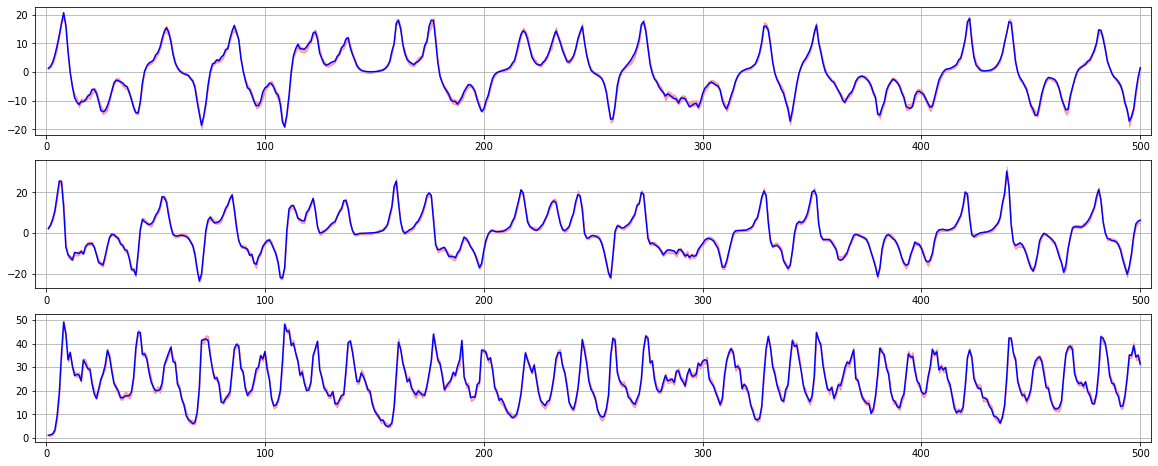

In [9]:
plt.rcParams['figure.figsize'] = (20.0, 8.0)
for i in range(3) :
    plt.subplot(3,1,i+1)
    CI = np.percentile(particles_airpf[:,:T,i],q=[2.5,97.5],axis=0)
    plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
    plt.grid(True)
    plt.plot(np.arange(1,T+1), X[1:,i], "blue")
    plt.xlim([-5,T+5])

In [10]:
log_NC_bpf[-1], log_NC_airpf[-1]

(-2568.441458658637, -2562.2876428339587)